In [ ]:
#Here, we attempt to reach the highest possible classification accuracy, working with unlabelled data. 

In [2]:
#Import all the libraries that we require
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import numpy as np
from sklearn import cross_validation
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\julie\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\julie\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
#Import the data. The target variable is not included in this file. 
data = pd.read_csv('data.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
0,NaN,-0.917557,19.607577,-0.554645,-0.070190,0.574078,1.171912,-0.016990,-0.714198,-0.018138,...,0.693705,-1.087513,-0.046509,0.105504,0.429171,-0.950374,1.004294,-0.191608,-1.364425,-0.429213
1,0.0,1.405869,21.515231,-1.511844,-0.586124,2.423895,0.775196,-0.415505,-0.671892,-0.655684,...,-0.085963,0.072455,1.306949,-0.728437,1.185076,0.731548,0.591346,-0.273151,1.664404,0.071316
2,1.0,-0.389747,20.692381,-0.356724,1.210862,-0.897038,0.987663,0.131566,-0.180066,0.544777,...,-0.816699,-1.518435,-0.630022,1.271507,0.089942,-0.288093,-0.868709,-1.784095,-1.463095,1.788054
3,2.0,-0.572894,20.690381,0.529177,0.096562,-0.805788,1.265500,-1.009898,-1.122972,-1.176405,...,0.975383,0.085923,-0.932246,0.874500,-0.624700,-0.463498,0.618506,0.768167,-0.873828,-0.524306
4,3.0,-0.009104,18.678118,0.936631,0.091671,-2.187237,1.179908,-0.711491,-0.648111,0.136265,...,0.145059,0.290151,-1.186000,-0.984330,2.669586,-0.390829,-0.020659,-1.025797,0.832689,-1.996523


In [4]:
#drop the first row, since this is an unused index
data.drop([0], axis = 1, inplace = True)

In [5]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
0,-0.917557,19.607577,-0.554645,-0.070190,0.574078,1.171912,-0.016990,-0.714198,-0.018138,0.577242,...,0.693705,-1.087513,-0.046509,0.105504,0.429171,-0.950374,1.004294,-0.191608,-1.364425,-0.429213
1,1.405869,21.515231,-1.511844,-0.586124,2.423895,0.775196,-0.415505,-0.671892,-0.655684,2.210577,...,-0.085963,0.072455,1.306949,-0.728437,1.185076,0.731548,0.591346,-0.273151,1.664404,0.071316
2,-0.389747,20.692381,-0.356724,1.210862,-0.897038,0.987663,0.131566,-0.180066,0.544777,-1.064934,...,-0.816699,-1.518435,-0.630022,1.271507,0.089942,-0.288093,-0.868709,-1.784095,-1.463095,1.788054
3,-0.572894,20.690381,0.529177,0.096562,-0.805788,1.265500,-1.009898,-1.122972,-1.176405,-0.980322,...,0.975383,0.085923,-0.932246,0.874500,-0.624700,-0.463498,0.618506,0.768167,-0.873828,-0.524306
4,-0.009104,18.678118,0.936631,0.091671,-2.187237,1.179908,-0.711491,-0.648111,0.136265,0.830598,...,0.145059,0.290151,-1.186000,-0.984330,2.669586,-0.390829,-0.020659,-1.025797,0.832689,-1.996523


In [6]:
#use describe to get a feel for the data. 
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,121,122,123,124,125,126,127,128,129,130
count,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,...,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000,9001.000000
mean,0.021775,19.983433,0.021950,-0.006238,0.009951,1.199266,-0.009266,0.292354,0.002360,0.486330,...,-0.009437,-0.021714,-0.000304,0.002258,0.008332,0.002730,0.002677,-0.008155,0.014580,0.007389
std,0.990583,1.018145,1.004955,1.002877,0.997918,0.230632,0.999751,2.135652,1.004751,1.544129,...,0.999987,1.006917,0.982559,0.994864,1.004327,1.001656,1.016695,0.998269,1.015322,1.001515
min,-3.805191,16.521388,-3.813524,-3.782030,-3.674718,0.237787,-3.937798,-7.317683,-3.690032,-4.093185,...,-3.766574,-3.839330,-4.209261,-3.812813,-3.452933,-3.699101,-3.720500,-4.115588,-4.257204,-3.630376
25%,-0.653402,19.299701,-0.644867,-0.688150,-0.658964,1.037084,-0.676280,-1.088279,-0.660595,-0.639037,...,-0.685206,-0.699840,-0.658816,-0.672473,-0.692301,-0.671135,-0.676930,-0.684528,-0.665377,-0.675552
50%,0.029441,19.979580,0.027893,-0.005734,0.003880,1.188561,-0.008077,0.060492,0.001536,0.491616,...,0.009714,-0.015157,-0.005415,-0.006915,-0.005040,-0.000994,0.009677,-0.011939,0.026171,0.000860
75%,0.693517,20.665438,0.695932,0.673945,0.702303,1.358025,0.657773,1.456774,0.677010,1.563495,...,0.665354,0.657907,0.656635,0.694592,0.685880,0.679777,0.686016,0.644102,0.700848,0.678140
max,3.735828,24.018554,3.979113,4.057908,3.588100,1.957494,3.743804,9.802432,3.751348,6.595337,...,3.724825,3.364573,3.523111,3.489505,3.575871,4.320826,3.428363,4.199790,3.715033,4.532005


In [7]:
data.info

<bound method DataFrame.info of            1          2         3         4         5         6         7    \
0    -0.917557  19.607577 -0.554645 -0.070190  0.574078  1.171912 -0.016990   
1     1.405869  21.515231 -1.511844 -0.586124  2.423895  0.775196 -0.415505   
2    -0.389747  20.692381 -0.356724  1.210862 -0.897038  0.987663  0.131566   
3    -0.572894  20.690381  0.529177  0.096562 -0.805788  1.265500 -1.009898   
4    -0.009104  18.678118  0.936631  0.091671 -2.187237  1.179908 -0.711491   
5    -0.573033  19.642885  0.377389 -0.451633  0.296578  1.354288  1.377894   
6     0.070574  17.798687 -0.415995  0.718748 -0.492743  1.314323 -0.134787   
7     0.062690  19.003464  0.506191 -0.069686  2.374042  1.370449 -0.856649   
8    -1.003175  20.468448  0.796586  0.081569 -1.086547  1.117004  0.682619   
9     0.298271  18.819994 -0.810196 -0.773473 -0.384262  0.986270 -1.834845   
10    0.239236  20.375439 -0.408252  0.858290 -0.639484  0.856775  0.606376   
11   -0.289662  20.4

In [11]:
#Read in the response/target data. 
resp = pd.read_csv('target.csv', header = None)
resp.head()

,0,1
0,NaN,1.0
1,0.0,1.0
2,1.0,0.0
3,2.0,0.0
4,3.0,1.0


In [12]:
#remove the unused index column
resp.drop([0], axis = 1, inplace = True)
resp.head()

,1
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [13]:
#the response will be the 'y' that we are trying to predict
resp.rename(columns={1: "y"}, inplace = True)
resp.head()

,y
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0


In [14]:
#add the response column to the data
df = pd.concat([data, resp], axis=1, join_axes=[data.index])
df.head()

,1,2,3,4,5,6,7,8,9,10,...,122,123,124,125,126,127,128,129,130,y
0,-0.917557,19.607577,-0.554645,-0.070190,0.574078,1.171912,-0.016990,-0.714198,-0.018138,0.577242,...,-1.087513,-0.046509,0.105504,0.429171,-0.950374,1.004294,-0.191608,-1.364425,-0.429213,1.0
1,1.405869,21.515231,-1.511844,-0.586124,2.423895,0.775196,-0.415505,-0.671892,-0.655684,2.210577,...,0.072455,1.306949,-0.728437,1.185076,0.731548,0.591346,-0.273151,1.664404,0.071316,1.0
2,-0.389747,20.692381,-0.356724,1.210862,-0.897038,0.987663,0.131566,-0.180066,0.544777,-1.064934,...,-1.518435,-0.630022,1.271507,0.089942,-0.288093,-0.868709,-1.784095,-1.463095,1.788054,0.0
3,-0.572894,20.690381,0.529177,0.096562,-0.805788,1.265500,-1.009898,-1.122972,-1.176405,-0.980322,...,0.085923,-0.932246,0.874500,-0.624700,-0.463498,0.618506,0.768167,-0.873828,-0.524306,0.0
4,-0.009104,18.678118,0.936631,0.091671,-2.187237,1.179908,-0.711491,-0.648111,0.136265,0.830598,...,0.290151,-1.186000,-0.984330,2.669586,-0.390829,-0.020659,-1.025797,0.832689,-1.996523,1.0


In [15]:
#see whether there are any strong correlations between different variables in the data. 
corr = df.corr()
#fig, ax = plt.subplots(figsize = (10,10))
#sns.heatmap(corr, ax = ax)

In [17]:
corr.sort_values('y', axis = 0, ascending = False)

,1,2,3,4,5,6,7,8,9,10,...,122,123,124,125,126,127,128,129,130,y
y,0.015677,-0.001293,-0.002746,-0.016398,0.005684,-0.530080,0.009689,0.337648,0.007972,0.289651,...,-0.002813,0.009477,0.008879,-0.006661,-0.007156,-0.017604,-0.001636,0.020698,0.007554,1.000000
91,0.006461,-0.006340,-0.012868,0.002831,0.019009,-0.751261,0.010018,0.190939,0.012104,0.079071,...,0.004174,0.015030,0.018237,-0.006067,0.006849,-0.003848,0.002496,-0.002864,0.005949,0.613763
51,0.004184,-0.002166,-0.007218,-0.007776,0.015324,-0.954164,0.008055,0.285376,-0.004010,0.655681,...,0.004045,0.017440,0.012555,-0.017905,0.011327,-0.000788,0.021760,0.001239,0.011633,0.418397
8,-0.004580,-0.008287,0.012501,-0.029860,-0.004388,-0.319972,0.025809,1.000000,-0.007913,0.401573,...,-0.008250,0.018669,0.010384,0.002346,-0.003078,-0.011161,0.007001,-0.002138,0.000606,0.337648
83,-0.004100,0.003119,0.014439,-0.000903,0.012171,-0.455734,0.015364,0.454035,0.003073,0.734061,...,-0.015866,0.009666,-0.000197,0.006434,-0.008752,-0.006372,0.018448,0.011167,0.010187,0.317827
10,0.005892,0.004875,0.006098,-0.009727,0.008972,-0.521436,0.015444,0.401573,0.001858,1.000000,...,-0.001446,0.015474,0.002253,-0.003987,-0.005074,-0.005861,0.017304,0.007331,0.011958,0.289651
32,-0.008406,-0.013270,-0.000289,-0.015124,-0.007359,-0.026272,0.006404,0.447002,-0.008787,-0.594270,...,-0.003203,0.004105,0.011119,0.000119,0.007452,-0.002793,-0.006884,-0.009853,-0.008874,0.120522
79,0.029448,0.002509,0.006266,-0.005857,-0.010754,-0.041382,0.016805,0.010253,-0.000007,0.013921,...,0.000400,0.019273,0.002126,-0.009769,-0.005369,0.015618,-0.006190,0.000847,0.006662,0.027031
61,-0.004661,-0.004836,0.010503,-0.011824,-0.000064,-0.021245,0.010373,0.019900,-0.011221,0.013102,...,0.020474,-0.012418,0.001770,0.017681,0.018389,-0.003649,0.014868,-0.011765,0.006010,0.023669
129,0.006854,-0.007617,-0.002770,-0.003207,0.007556,0.001666,0.011354,-0.002138,0.018342,0.007331,...,-0.002108,0.008134,-0.014686,0.002109,-0.002057,-0.004643,0.001104,1.000000,-0.006247,0.020698


In [18]:
#select the features that appear to be most impactful, along with the response variable. 
data_red = df[[91, 51, 8, 83, 10, 'y']]
data_red.head()

,91,51,8,83,10,y
0,1.065987,0.134519,-0.714198,-0.213296,0.577242,1.0
1,0.552593,4.801578,-0.671892,0.309613,2.210577,1.0
2,1.733128,1.342294,-0.180066,-2.737104,-1.064934,0.0
3,-0.922580,0.008435,-1.122972,-1.836211,-0.980322,0.0
4,1.183041,0.013705,-0.648111,0.064628,0.830598,1.0


In [19]:
corr = data_red.corr()
corr.head()

,91,51,8,83,10,y
91,1.000000,0.548950,0.190939,0.246874,0.079071,0.613763
51,0.548950,1.000000,0.285376,0.579809,0.655681,0.418397
8,0.190939,0.285376,1.000000,0.454035,0.401573,0.337648
83,0.246874,0.579809,0.454035,1.000000,0.734061,0.317827
10,0.079071,0.655681,0.401573,0.734061,1.000000,0.289651


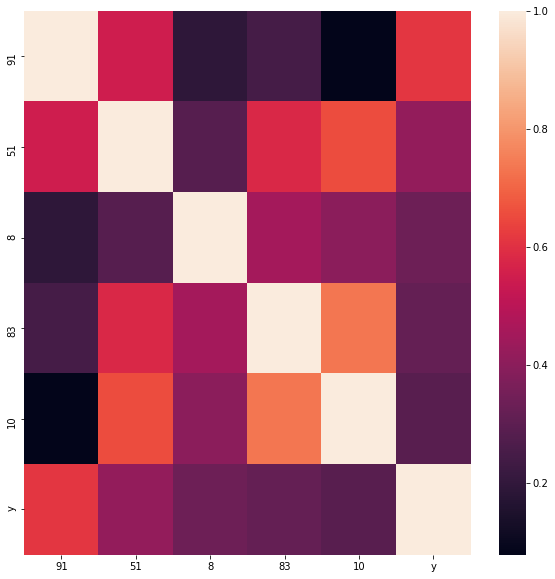

In [20]:
#check that these variables are not too correlated with each other. 
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, ax = ax)

In [21]:
#try to fit to a simple regression model.
X = data_red.drop(['y'], axis = 1)
y = data_red['y']

In [22]:
X.head()

,91,51,8,83,10
0,1.065987,0.134519,-0.714198,-0.213296,0.577242
1,0.552593,4.801578,-0.671892,0.309613,2.210577
2,1.733128,1.342294,-0.180066,-2.737104,-1.064934
3,-0.922580,0.008435,-1.122972,-1.836211,-0.980322
4,1.183041,0.013705,-0.648111,0.064628,0.830598


In [23]:
y.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: y, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

In [25]:
clf = LogisticRegression().fit(X_train, y_train)

In [26]:
clf.score(X_train, y_train)

0.8454166666666667

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.88      0.82      0.85       916
        1.0       0.83      0.88      0.85       885

avg / total       0.85      0.85      0.85      1801



In [29]:
confusion_matrix(y_test, y_pred)

array([[752, 164],
       [107, 778]], dtype=int64)

TN      FP
FN      TP

In [ ]:
#85% is an OK start, but nothing to write home about. See whether standardization will improve the model

In [30]:
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)

In [31]:
clf = LogisticRegression().fit(X_std_train, y_train)

In [32]:
clf.score(X_std_train, y_train)

0.8454166666666667

In [ ]:
#Looks like nothing much changed....
#Plot the data to see whether a transformation might be useful to make it more linear. 

C:\Users\julie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\julie\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\julie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


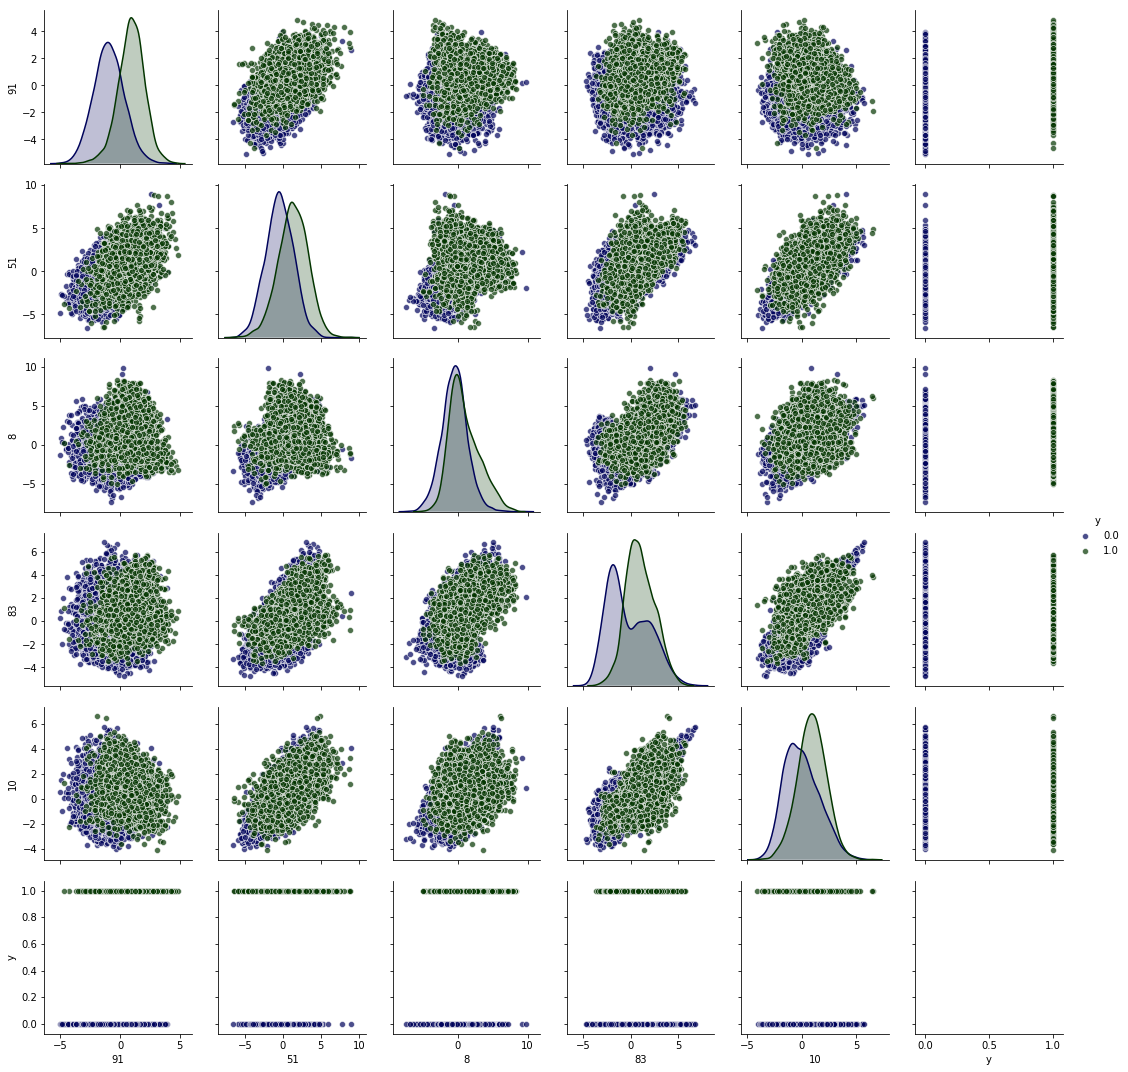

In [33]:
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
sns.pairplot(data_red, hue = 'y', diag_kind = 'kde', palette= palette, plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(shade=True))

In [ ]:
#There is no obvious transformation that jumps out, but it looks like the two responses are quite 'on top of each other'
#It might be worth using SVMs, since their "kernal trick" can help to separate data by adding dimensions. 

In [ ]:
#We will also try kNN. 

In [34]:
#Instantiate the SVM model
clf = svm.SVC(decision_function_shape='ovo')
##>>> clf.fit(X, Y) 

In [35]:
#Fit our data using the training dataset
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
#check the accuracy against the test dataset
clf.score(X_test, y_test)

0.9461410327595781

In [ ]:
#Looks pretty good out of the box! Use grid search to optimise the parameters

In [37]:
grid_param = {  
    'degree': [1,2,3,5,10],
    'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 1, 10],
    'tol':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
    'decision_function_shape': ['ovo']
}

In [38]:
gd_sr = GridSearchCV(estimator=clf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [39]:
gd_sr.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'degree': [1, 2, 3, 5, 10], 'gamma': ['auto', 0.0001, 0.001, 0.01, 0.1, 1, 10], 'tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1], 'decision_function_shape': ['ovo']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
best_parameters = gd_sr.best_params_  
print(best_parameters)  

{'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'auto', 'tol': 0.1}


In [41]:
clf = svm.SVC(kernel = 'rbf', degree= 1, tol = 0.1, gamma = 'auto', decision_function_shape = 'ovo')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9450305385896725

In [ ]:
#The optimised parameters in fact do not seem to be quite so good. Let's see what happens when we drop the tolerance.

In [42]:
clf = svm.SVC(kernel = 'rbf', tol = 0.001, decision_function_shape = 'ovo')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9461410327595781

In [ ]:
#This improves things slightly, bringing us back to the level of our original test. 

In [ ]:
#How does changing the gamma and tolerance values affect the accuracy?

In [43]:
cv_scores = []
n = np.arange(0.1, 2, 0.1)
for k in n:
    clf = svm.SVC(kernel = 'rbf', gamma = k)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv = 5)
    cv_scores.append(scores.mean())

In [44]:
cv_scores

[0.9430577525543218,
 0.9444465455953635,
 0.9434741299359766,
 0.9430571737163798,
 0.9434736476156779,
 0.9422238399811687,
 0.942362246683718,
 0.9418070766628993,
 0.9413906991472851,
 0.9415297810714607,
 0.9415300704904318,
 0.9411135965911335,
 0.9405580407676594,
 0.9395861075625305,
 0.9393085225521209,
 0.9381977004581031,
 0.9379201154476938,
 0.9372255743516466,
 0.9361144627046984]

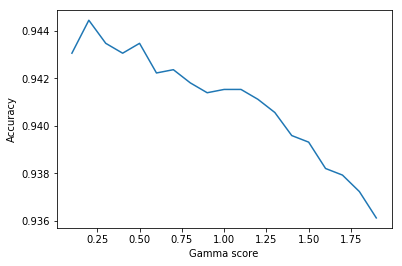

In [45]:
plt.plot(n, cv_scores)
plt.xlabel('Gamma score')
plt.ylabel('Accuracy')
plt.show()

In [46]:
cv_scores = []
n = np.arange(0.001, 1, 0.05)
for k in n:
    clf = svm.SVC(kernel = 'rbf', tol = k)
    scores = cross_validation.cross_val_score(clf, X_train, y_train, cv = 5)
    cv_scores.append(scores.mean())

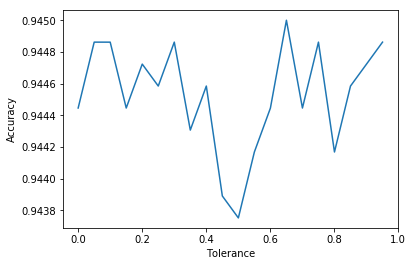

In [47]:
plt.plot(n, cv_scores)
plt.xlabel('Tolerance')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#The gamma value seems to be best at around 0.25. The accuracy when changing tol flails wildly. 

In [ ]:
#Let's have a look at the kNN model to see how it compares. 

In [48]:
knn = neighbors.KNeighborsClassifier(30).fit(X_train,y_train)

In [49]:
knn.score(X_train, y_train)

0.9381944444444444

In [50]:
knn.score(X_test, y_test)

0.9383675735702388

In [51]:
y_pred = knn.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.93      0.95      0.94       916
        1.0       0.95      0.93      0.94       885

avg / total       0.94      0.94      0.94      1801



In [331]:
confusion_matrix(y_test, y_pred)

array([[871,  45],
       [ 66, 819]], dtype=int64)

In [ ]:
#The kNN model is  also pretty good out of the box, though not quite as good as SVM. 

In [ ]:
#try tuning the parameters

In [53]:
cv_scores = []

In [54]:
n = np.arange(1,100)

In [55]:
for k in n:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_validation.cross_val_score(knn, X_train, y_train, cv = 5)
    cv_scores.append(scores.mean())

In [56]:
cv_scores

[0.8986130008743253,
 0.8947246902875415,
 0.9338906968699776,
 0.9329182809426724,
 0.9387519062402025,
 0.9391681869702546,
 0.9381956749271838,
 0.9387509411977277,
 0.9384739350252602,
 0.938751905972284,
 0.9380568824219792,
 0.9386130168154766,
 0.9383351426540146,
 0.9386132098507636,
 0.9383347568513596,
 0.9380570754572659,
 0.9373630165475582,
 0.9376409870927043,
 0.9370852385018619,
 0.9376403120050373,
 0.9369458672926744,
 0.936390504504487,
 0.9365298755797153,
 0.9366686680849202,
 0.9363910832084699,
 0.9361128229764344,
 0.9355572672869193,
 0.9361129194940776,
 0.9358350451986563,
 0.9355574600542876,
 0.9352793928575389,
 0.9345849480112168,
 0.934445673453632,
 0.9338898282111868,
 0.9336125327537076,
 0.933334561940643,
 0.9334736437308596,
 0.9334733543118885,
 0.933057459116573,
 0.9323626286015548,
 0.9329184737100407,
 0.933057459116573,
 0.9331962516217777,
 0.9330576520179006,
 0.9329184737100407,
 0.9322241255153212,
 0.9320850435911454,
 0.9319458652832855

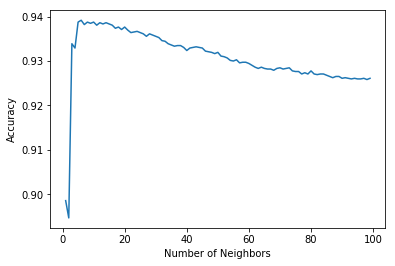

In [57]:
plt.plot(n, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Looks like 6 is the optimum number of neighbors. 

In [58]:
knn = neighbors.KNeighborsClassifier(6).fit(X_train,y_train)

In [59]:
knn.score(X_test, y_test)

0.9450305385896725

In [ ]:
#...though the results are still not quite as good as with SVM

In [ ]:
#Optimise the parameters with gridsearch

In [60]:
knn = neighbors.KNeighborsClassifier(6)

In [61]:
grid_param = {  
    'n_neighbors': [1, 3, 5, 8, 10, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[5, 10, 20, 30, 40, 50, 100]
}

In [62]:
gd_sr = GridSearchCV(estimator=knn,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [63]:
gd_sr.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 8, 10, 15, 20, 30], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [5, 10, 20, 30, 40, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
best_parameters = gd_sr.best_params_  
print(best_parameters)  

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 10, 'weights': 'distance'}


In [65]:
#Fit a model with these optimised parameters
knn = neighbors.KNeighborsClassifier(algorithm = 'auto', leaf_size = 5, n_neighbors = 6, weights = 'distance').fit(X_train,y_train)

In [66]:
knn.score(X_test, y_test)

0.9472515269294837

In [ ]:
#94.7% is our running high score!

In [ ]:
#How do things change if we pass all of our data into the two models that we have optimised?

In [67]:
X = df.drop(['y'], axis = 1)
y = df['y']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=121)

In [69]:
knn = neighbors.KNeighborsClassifier(algorithm = 'auto', 
                                     leaf_size = 5, 
                                     n_neighbors = 6, 
                                     weights = 'distance').fit(X_train,y_train)

In [70]:
knn.score(X_test, y_test)

0.8989450305385897

In [71]:
clf = svm.SVC(kernel = 'rbf', tol = 0.001, decision_function_shape = 'ovo').fit(X_train, y_train)

In [72]:
clf.score(X_test, y_test)

0.9317046085508051

In [ ]:
#The score drops notably for both, though SVM is predictably less affected here (SVM models are good at handling high-
#dimensional data)

In [ ]:
#Let's see which features a Random Forest model says are the most important in our data. 

In [75]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 90 (0.101852)
2. feature 71 (0.099364)
3. feature 82 (0.061249)
4. feature 5 (0.060242)
5. feature 85 (0.046341)
6. feature 93 (0.042659)
7. feature 74 (0.042401)
8. feature 50 (0.032883)
9. feature 7 (0.030300)
10. feature 9 (0.028456)
11. feature 64 (0.026270)
12. feature 54 (0.022394)
13. feature 31 (0.021092)
14. feature 40 (0.003495)
15. feature 39 (0.003490)
16. feature 118 (0.003487)
17. feature 127 (0.003486)
18. feature 3 (0.003481)
19. feature 70 (0.003477)
20. feature 112 (0.003474)
21. feature 21 (0.003464)
22. feature 45 (0.003455)
23. feature 53 (0.003452)
24. feature 110 (0.003447)
25. feature 106 (0.003446)
26. feature 92 (0.003440)
27. feature 52 (0.003433)
28. feature 23 (0.003429)
29. feature 67 (0.003424)
30. feature 113 (0.003424)
31. feature 26 (0.003415)
32. feature 88 (0.003414)
33. feature 17 (0.003412)
34. feature 15 (0.003411)
35. feature 6 (0.003404)
36. feature 18 (0.003403)
37. feature 0 (0.003402)
38. feature 30 (0.003396)
39. 

In [82]:
# data_red = df[[91, 51, 8, 83, 10, 'y']]
# data_red.head()

#Take the most important features from the dataset (as determined by the tree classifier) and feed them into the 2 models
#(note the increased number due to the original labelling)
data_blu = df[[91, 72, 83, 6, 86, 94, 75, 51, 8, 'y']]
data_blu.head()

,91,72,83,6,86,94,75,51,8,y
0,1.065987,-0.294023,-0.213296,1.171912,-0.874872,-0.885095,1.296835,0.134519,-0.714198,1.0
1,0.552593,-0.596780,0.309613,0.775196,-0.560145,-3.207034,0.364040,4.801578,-0.671892,1.0
2,1.733128,-1.205347,-2.737104,0.987663,4.226640,-2.678449,1.946474,1.342294,-0.180066,0.0
3,-0.922580,0.504034,-1.836211,1.265500,2.100522,-0.315039,0.239222,0.008435,-1.122972,0.0
4,1.183041,-0.334563,0.064628,1.179908,-1.443608,-0.862225,1.420287,0.013705,-0.648111,1.0


In [83]:
#Check for excessive correlation between the selected variables
corr = data_blu.corr()
corr.head()

,91,72,83,6,86,94,75,51,8,y
91,1.000000,-0.612766,0.246874,-0.751261,0.113608,-0.312585,-0.097262,0.548950,0.190939,0.613763
72,-0.612766,1.000000,-0.261932,0.662439,-0.228022,0.731312,-0.207111,-0.514886,-0.820864,-0.550571
83,0.246874,-0.261932,1.000000,-0.455734,-0.754422,0.101435,-0.679875,0.579809,0.454035,0.317827
6,-0.751261,0.662439,-0.455734,1.000000,0.094339,0.602135,0.188232,-0.954164,-0.319972,-0.530080
86,0.113608,-0.228022,-0.754422,0.094339,1.000000,-0.219315,0.399316,-0.277895,0.050601,-0.071815


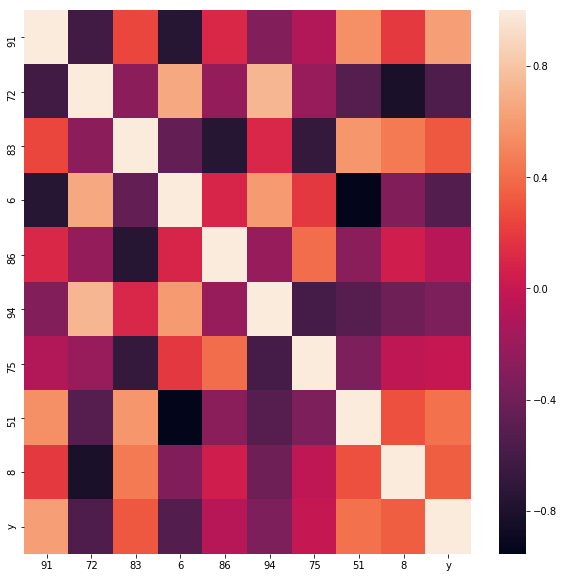

In [84]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, ax = ax)

In [ ]:
#Looks good! Now let's build our final models. 

In [108]:
X = data_blu.drop(['y'], axis = 1)
y = data_blu['y']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=126)

In [110]:
#knn - features#2

In [111]:
knn = neighbors.KNeighborsClassifier(algorithm = 'auto', 
                                     leaf_size = 5, 
                                     n_neighbors = 6, 
                                     weights = 'distance').fit(X_train,y_train)

In [112]:
scores = cross_validation.cross_val_score(knn, X_train, y_train, cv = 5)
scores.mean()

0.945833408551455

In [113]:
#svm - features#2

In [114]:
clf = svm.SVC(kernel = 'rbf', tol = 0.001, decision_function_shape = 'ovo')

In [115]:
scores = cross_validation.cross_val_score(clf, X_train, y_train, cv = 5)
scores.mean()

0.9470838914075909

In [116]:
data_blu.head()

,91,72,83,6,86,94,75,51,8,y
0,1.065987,-0.294023,-0.213296,1.171912,-0.874872,-0.885095,1.296835,0.134519,-0.714198,1.0
1,0.552593,-0.596780,0.309613,0.775196,-0.560145,-3.207034,0.364040,4.801578,-0.671892,1.0
2,1.733128,-1.205347,-2.737104,0.987663,4.226640,-2.678449,1.946474,1.342294,-0.180066,0.0
3,-0.922580,0.504034,-1.836211,1.265500,2.100522,-0.315039,0.239222,0.008435,-1.122972,0.0
4,1.183041,-0.334563,0.064628,1.179908,-1.443608,-0.862225,1.420287,0.013705,-0.648111,1.0


In [ ]:
#Here the original SVM model came out on top. For a real application it would be sensible to dig deeper into this tolerance
#argument and try to find out why trying to optimise here is so tricky. When tested against unseen data, this last model 
#performed well, being pipped to the post by only one other in the class. 